# Team 46 ENGR 1110 Project
by **Bo Stokes, Vivek Patel, Sam Germanson, Jayvin Amis, and Joshua Winn**



In [ ]:
# Do not need to run again
! pip install pandas
! pip install numpy
! pip install matplotlib

Installing all of our needed packages:

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import csv
from collections import defaultdict

The dataset we are using contains data on antidepressant use within the scandinvaian countries of Sweden, Denmark, and Norway. The dataset comes from kaggle at https://www.kaggle.com/datasets/thedevastator/antidepressant-use-in-scandinavia/.

From the dataset description: "This dataset provides a comprehensive look into the use of antidepressant drugs among children and adolescents in Denmark, Norway and Sweden from 2007 to 2017"

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/BoStokes/ENGR1110_Project/main/drug_use.csv') # create our main pandas dataframe from the csv
df.head() # show top 5 rows to make sure it works

,atc,year,sex,age,nusers,ddd,users_pr_1000,ddd_pr_1000,country,drug_group
0,N06A,2007,F,5-9,43,7000.0,0.261959,42.644444,DK,AD
1,N06A,2007,M,5-9,98,17000.0,0.569542,98.798149,DK,AD
2,N06A,2007,F,10-14,653,191000.0,3.799516,1111.343872,DK,AD
3,N06A,2007,M,10-14,581,175000.0,3.206579,965.836975,DK,AD
4,N06A,2007,F,15-19,5578,1499000.0,35.520290,9545.521484,DK,AD


The following code creates a graph that shows the amount of antidepressants that are used in all of scandinavia in each year

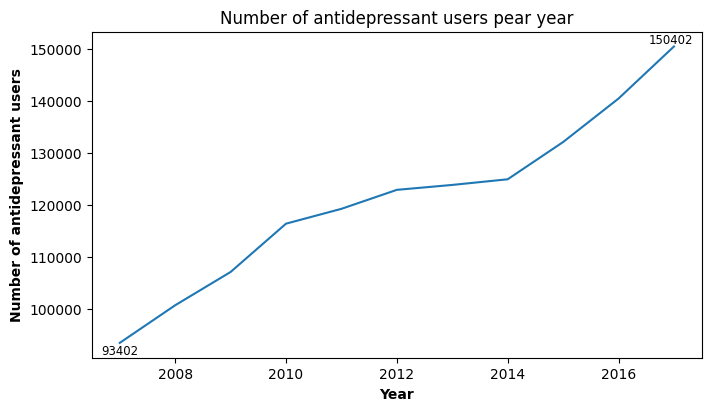

In [ ]:
# Bo Stokes, Sam Germanson, Jayvin Amis
fig, ax = plt.subplots(layout='constrained')
dd = defaultdict(int) # dictionary that stores the number of users of drugs in each year
for year, nusers in zip(df['year'], df['nusers']):
    dd[year] += int(nusers)
x, y = dd.keys(), dd.values()
ax.plot(x, y)
ax.set_title('Number of antidepressant users pear year')
fig.set_figheight(4)
fig.set_figwidth(7)
plt.xlabel('Year', fontweight='bold')
plt.ylabel('Number of antidepressant users', fontweight='bold')


plt.annotate(f'{dd[2007]}', # annotation text
                 (2007, dd[2007]), # text coordinates
                 textcoords="offset points", # how to position the text
                 xytext=(0,-8), # distance from text to points (x,y)
                 ha='center',
                 fontsize='small')
plt.annotate(f'{dd[2017]}', # annotation text
                 (2017, dd[2017]), # text coordinates
                 textcoords="offset points", # how to position the text
                 xytext=(-2,2), # distance from text to points (x,y)
                 ha='center',
                 fontsize='small')
plt.savefig('nusers_year_plot')
plt.show()

Observing this graph, we see a clear upward trend of antidepressant use over time. The number of antidepressant users has been increasing steadily over time, from 93,402 in 2008 to 150,402 in 2019, representing a 60% increase in just one decade. A possible explanation for this trend is that awareness of mental health issues has grown significantly in recent years, and there is a higher likelihood that people will seek treatment for their depression. However, there is also a possibility of prescription antidepressants becoming more widely prescribed, with more cases where doctors are recommending antidepressants even for milder cases of depression. Regardless of the explanation, the rising number of adolescent users of antidepressant drugs is a significant trend.

The next section of code creates a bar graph in which the amount of antidepressant users is compared among the three scandinavian countries.

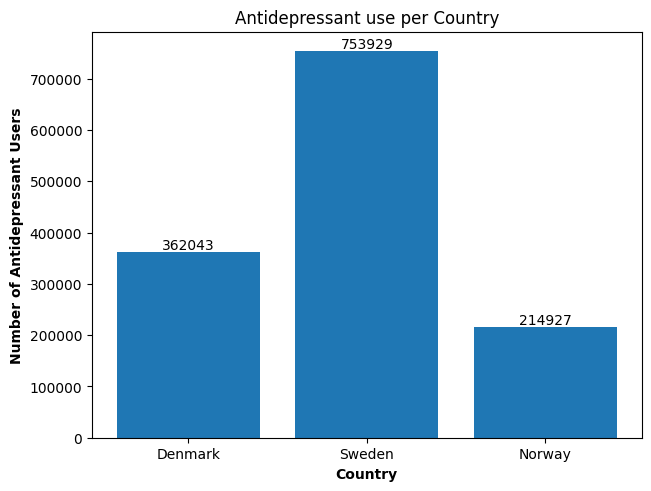

In [ ]:
# Bo Stokes, Jayvin Amis, Vivek Patel
fig, ax = plt.subplots(layout='constrained')
denmark = 0
sweden = 0
norway = 0
for country, nusers in zip(df['country'], df['nusers']):
    if country == 'DK':
        denmark += nusers
    elif country == 'SE':
        sweden += nusers
    elif country == 'NO':
        norway += nusers
x = ['Denmark', 'Sweden', 'Norway']
y = [denmark, sweden, norway]
con = ax.bar(x, y)
ax.set_title('Antidepressant use per Country')
plt.xlabel('Country', fontweight='bold')
plt.ylabel('Number of Antidepressant Users', fontweight='bold')
plt.bar_label(con, labels=[denmark, sweden, norway])
plt.show()

The graph shows that there are more than double the amount the amount of adolescent antidepressant users in Sweden than in Denmark, and 1.5 times the amount in denmark than in norway. Denmark and Norway have relatively equal populations around 5.5 million, while Sweden is about double that at 10.5 million. When adjusted for population, Sweden and Denmark contain far more users of antidepressants than Norway. Based on this data, we can conclude that Norwegian adolescents have lower rates of depression if we assume the three nations are equal in their diagnosis and treatment of clinical depression.

The next section of code creates a pie chart that shows the proportion of the total made up by each drug group

Monoamine oxidase inhibitors, non-selective


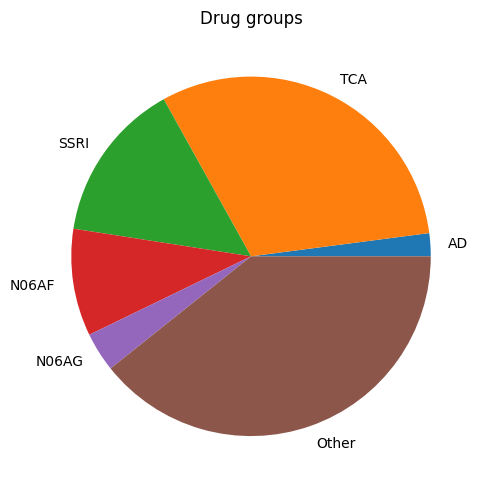

In [ ]:
# Bo Stokes, Sam Germanson
names = pd.read_csv('https://raw.githubusercontent.com/BoStokes/ENGR1110_Project/main/drug_names.csv')
code_to_names = {atc:name for atc, name in zip(names['atc'], names['formalname'])}
print(code_to_names['N06AF'])
counts = {}
names = []
for group in df['drug_group']:
    if group in counts:
        counts[group] += 1
    else:
        counts[group] = 1
        names.append(group)
fig, ax = plt.subplots(layout='constrained')
ax.pie(counts.values(), labels=names)
ax.set_title('Drug groups')
plt.show()

Each of these groups is a type of antidepressant that is prescribed to patients. They are grouped based upon similar characteristics and  These are descriptions of the different types from the Mayo Clinic website:

*   TCA: Tricyclic and tetracyclic antidepressants are some of the first antidepressants ever discovered. They are effective, but often carry major side effects and therefore are often substituted with alternatives with less side effects. However, they can work in cases where no other antidepressants have worked on a patient
*   SSRI: Selective serotonin reuptake inhibitors are some of the most commonly prescribed antidepressants, and are usually the first type prescribed. They can ease symptoms of moderate to severe depression, are relatively safe and typically cause fewer side effects than other types of antidepressants do.
*   N06AF/N06AG: Monoamine oxidase inhibitors were the first antidepressants ever developed. They require diet restrictions and avoidance of certain medicines and can cauyse very high blood pressure, so they are generally replaced by other drugs
*   AD/Other: These antidepressants are atypical don't fit neatly into any of the other antidepressant categories

This chart exhibits the fact that antidepressants are not uniform, and antidepressants work differently for different people. Often times it takes multiple tries to find an antidepressant that works for an individual.



The next section creates a bar graph the seperates based upon age and sex of users

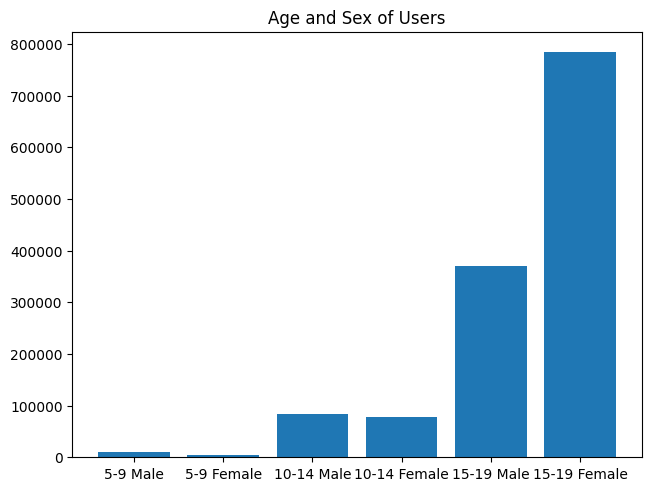

In [ ]:
# Josh Winn, Jayvin Amis
ages_5_9_male, ages_5_9_female = 0, 0
ages_10_14_male, ages_10_14_female = 0, 0
ages_15_19_male, ages_15_19_female = 0, 0
for sex, age, nusers in zip(df['sex'], df['age'], df['nusers']):
    if age == '5-9':
        if sex == 'M':
            ages_5_9_male += nusers
        else:
            ages_5_9_female += nusers
    elif age == '10-14':
        if sex == 'M':
            ages_10_14_male += nusers
        else:
            ages_10_14_female += nusers
    elif age == '15-19':
        if sex == 'M':
            ages_15_19_male += nusers
        else:
            ages_15_19_female += nusers
fig, ax = plt.subplots(layout='constrained')
x = ['5-9 Male', '5-9 Female', '10-14 Male', '10-14 Female', '15-19 Male', '15-19 Female']
y = [ages_5_9_male, ages_5_9_female, ages_10_14_male, ages_10_14_female, ages_15_19_male, ages_15_19_female]
ax.bar(x, y)
ax.set_title('Age and Sex of Users')
plt.show()

This graph shows the amount of users of antidepressants categorized by age and gender. The ages are split into groups of 5-9, 10-14, and 15-19. Unsurprisingly, the majority of those who use antidepressants are in the older age group, with very few users less than 9 years old. The sex of users per age group is about equal for the younger age groups, but in the oldest age group the amount of females is double the amount of males. This indicates that there is a difference in development between men and women as they go through puberty, and that the difference in hormonal and emotional changes experienced by women vs. men during puberty could be a reason for the large gap.